In [16]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import rpy2.robjects as robj
import pyreadr
%matplotlib inline
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
import sys
import time as Time
import pickle

In [17]:
sys.path.append("/home/huaqingj/MyResearch/dynamicR2py")
from utils import *

In [18]:
robj.r["load"]("/home/huaqingj/MyResearch/dynamicR2py/data/datamatrix3chg6rank.Rdata")

'datamatrix','truematrix','candlist0','trueU'


In [19]:
kappa = 1.53
lamb = 1e-6
r = 6 
Lmin = 4

In [20]:
results = []

In [21]:
t0 = Time()
for i in range(100):
    print(f"{i+1}/{100}th")
    Ymat = np.array(robj.r["datamatrix"][i])
    TrueXmat = np.array(robj.r["truematrix"][i])
    d, n = Ymat.shape
    time = np.linspace(0, 2, n)
    tStep = np.diff(time)[-1]
    dXmat, Xmat = GetBsplienEst(Ymat, time, lamb=lamb)
    Amat = GetAmat(dXmat, Xmat, time, 4)
    midRes = GetNewEst(dXmat, Xmat, Amat, r=r, is_full=True)
    ndXmat, nXmat = midRes.ndXmat, midRes.nXmat
    finalRes = EGenDy(ndXmat, nXmat, kappa=kappa, Lmin=Lmin, MaxM=10, diag=True)
    
    ecpts =finalRes.mbic_ecpts
    ndXmat = midRes.ndXmat
    nXmat = midRes.nXmat
    kpidxs = midRes.kpidxs
    eigVecs = midRes.eigVecs
    RecXmat = ReconXmat(ecpts, ndXmat, nXmat, kpidxs, eigVecs, TrueXmat, tStep) 
    
    tc = Time()
    print(f"The average time is {(tc-t0)/(i+1):.2f}s. The detected result is {finalRes.mbic_ecpts}")
    
    # Save the result
    result = edict()
    result.midRes = midRes
    result.finalRes = finalRes
    result.Amat = Amat
    result.Ymat = Ymat
    result.TrueXmat = TrueXmat 
    result.RecXmat = RecXmat
    result.paras = {"kappa":kappa, "r":r, "Lmin":Lmin, "lamb":lamb}
    results.append(result)

1/100th



The average time is 6.59s. The detected result is [ 27  99 144]
2/100th



The average time is 6.57s. The detected result is [ 49  97 143]
3/100th



The average time is 6.56s. The detected result is [ 46 100 144]
4/100th



The average time is 6.55s. The detected result is [ 49  98 130 144]
5/100th



The average time is 6.55s. The detected result is [ 51 100 143]
6/100th



The average time is 6.54s. The detected result is [ 50  98 143]
7/100th



The average time is 6.52s. The detected result is [ 45  99 140]
8/100th



The average time is 6.53s. The detected result is [ 49 100 144]
9/100th



The average time is 6.52s. The detected result is [ 48  99 142 166]
10/100th



The average time is 6.52s. The detected result is [ 47  97 120 144]
11/100th



The average time is 6.52s. The detected result is [ 49  99 141 148]
12/100th



The average time is 6.52s. The detected result is [ 48  98 144]
13/100th



The average time is 6.52s. The detected result is [ 49  99 143]
14/100th



The average time is 6.54s. The detected result is [ 42  99 143]
15/100th



The average time is 6.57s. The detected result is [ 98 144]
16/100th



The average time is 6.59s. The detected result is [ 48  98 146]
17/100th



The average time is 6.60s. The detected result is [ 50  98 139]
18/100th



The average time is 6.61s. The detected result is [ 46  96 145]
19/100th



The average time is 6.61s. The detected result is [ 31 101 144]
20/100th



The average time is 6.61s. The detected result is [ 48  98 145 154]
21/100th



The average time is 6.62s. The detected result is [ 30  97 141]
22/100th



The average time is 6.62s. The detected result is [ 13  99 142 166]
23/100th



The average time is 6.61s. The detected result is [ 49  97 144]
24/100th



The average time is 6.61s. The detected result is [ 49  95 145]
25/100th



The average time is 6.60s. The detected result is [ 45  93 144]
26/100th



The average time is 6.61s. The detected result is [ 49  97 145]
27/100th



The average time is 6.60s. The detected result is [ 51  96 143]
28/100th



The average time is 6.61s. The detected result is [ 49  97 143]
29/100th



The average time is 6.60s. The detected result is [ 45  97 145]
30/100th



The average time is 6.59s. The detected result is [ 21  98 144]
31/100th



The average time is 6.59s. The detected result is [ 51  99 144]
32/100th



The average time is 6.59s. The detected result is [ 89 128 146]
33/100th



The average time is 6.58s. The detected result is [ 45 100 143 162]
34/100th



The average time is 6.58s. The detected result is [ 47 101 145]
35/100th



The average time is 6.58s. The detected result is [ 98 143]
36/100th



The average time is 6.58s. The detected result is [ 44  98 142 168]
37/100th



The average time is 6.58s. The detected result is [ 48  99 146]
38/100th



The average time is 6.58s. The detected result is [ 49  98 141]
39/100th



The average time is 6.58s. The detected result is [ 49  99 145]
40/100th



The average time is 6.58s. The detected result is [ 49  99 143]
41/100th



The average time is 6.58s. The detected result is [ 20  52 100 145]
42/100th



The average time is 6.57s. The detected result is [ 49 100 142]
43/100th



The average time is 6.57s. The detected result is [ 46  98 142]
44/100th



The average time is 6.57s. The detected result is [ 50  98 142]
45/100th



The average time is 6.58s. The detected result is [ 47 100 144]
46/100th



The average time is 6.58s. The detected result is [ 47  97 144]
47/100th



The average time is 6.57s. The detected result is [ 26  99 145]
48/100th



The average time is 6.57s. The detected result is [ 50  97 145]
49/100th



The average time is 6.57s. The detected result is [100 132 144]
50/100th



The average time is 6.58s. The detected result is [ 49 100 143]
51/100th



The average time is 6.57s. The detected result is [ 49  99 141]
52/100th



The average time is 6.57s. The detected result is [ 46  97 142]
53/100th



The average time is 6.58s. The detected result is [ 50  97 135 144]
54/100th



The average time is 6.58s. The detected result is [ 15  48  98 143]
55/100th



The average time is 6.58s. The detected result is [ 47  96 144]
56/100th



The average time is 6.58s. The detected result is [ 47  99 144]
57/100th



The average time is 6.58s. The detected result is [ 42 100 144]
58/100th



The average time is 6.58s. The detected result is [ 52  97 145]
59/100th



The average time is 6.57s. The detected result is [ 29  99 145]
60/100th



The average time is 6.57s. The detected result is [ 51  95 144]
61/100th



The average time is 6.57s. The detected result is [ 50  97 142 168]
62/100th



The average time is 6.57s. The detected result is [ 50  99 116 145]
63/100th



The average time is 6.57s. The detected result is [ 47 100 142]
64/100th



The average time is 6.57s. The detected result is [ 49  98 139]
65/100th



The average time is 6.57s. The detected result is [ 30  99 139 146]
66/100th



The average time is 6.57s. The detected result is [ 48  99 138 146]
67/100th



The average time is 6.57s. The detected result is [ 48  99 144]
68/100th



The average time is 6.57s. The detected result is [ 45  99 145]
69/100th



The average time is 6.57s. The detected result is [ 99 144]
70/100th



The average time is 6.57s. The detected result is [ 50  98 125 144]
71/100th



The average time is 6.57s. The detected result is [ 49  98 145]
72/100th



The average time is 6.57s. The detected result is [ 25  98 145]
73/100th



The average time is 6.57s. The detected result is [ 49  99 145]
74/100th



The average time is 6.57s. The detected result is [ 48  97 144]
75/100th



The average time is 6.57s. The detected result is [ 49  99 144]
76/100th



The average time is 6.57s. The detected result is [ 48  98 145]
77/100th



The average time is 6.57s. The detected result is [ 48  98 141 173]
78/100th



The average time is 6.57s. The detected result is [ 50  99 142 171]
79/100th



The average time is 6.57s. The detected result is [ 48  99 145]
80/100th



The average time is 6.57s. The detected result is [ 47  96 144]
81/100th



The average time is 6.57s. The detected result is [ 46  99 144]
82/100th



The average time is 6.57s. The detected result is [ 46  97 144]
83/100th



The average time is 6.57s. The detected result is [ 50  99 144]
84/100th



The average time is 6.57s. The detected result is [ 44  99 143 170]
85/100th



The average time is 6.57s. The detected result is [ 48  99 145]
86/100th



The average time is 6.57s. The detected result is [ 47  97 144]
87/100th



The average time is 6.57s. The detected result is [ 50  95 144]
88/100th



The average time is 6.57s. The detected result is [ 49 100 144]
89/100th



The average time is 6.58s. The detected result is [ 31  99 145]
90/100th



The average time is 6.57s. The detected result is [ 49  98 142 168]
91/100th



The average time is 6.58s. The detected result is [100 142 172]
92/100th



The average time is 6.58s. The detected result is [ 13  51  99 144]
93/100th



The average time is 6.58s. The detected result is [ 48  98 145]
94/100th



The average time is 6.58s. The detected result is [ 48  99 137]
95/100th



The average time is 6.58s. The detected result is [ 49  98 144]
96/100th



The average time is 6.58s. The detected result is [ 46  97 145]
97/100th



The average time is 6.58s. The detected result is [ 50  98 142]
98/100th



The average time is 6.58s. The detected result is [ 92 144]
99/100th



The average time is 6.58s. The detected result is [ 49  94 142 162]
100/100th



The average time is 6.58s. The detected result is [ 49  96 119 144]


In [22]:
with open(f"./results/simu100.pkl", "wb") as f:
    pickle.dump(results, f)

In [23]:
with open(f"./results/simu100.pkl", "rb") as f:
    results = pickle.load(f)

### Plot the change points and the MBIC

In [24]:
# obtain the change points for 100 simulations
chgptss = [result.finalRes.mbic_ecpts for result in results]
#chgptss = [result.finalRes.chgMat[2, :3] for result in results]

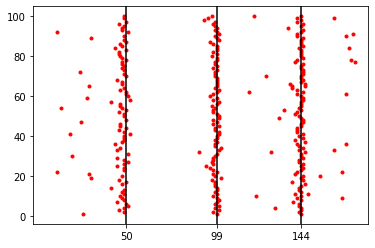

In [25]:
simuIdx = []
pos = []
for idx, chgpts in enumerate(chgptss):
    pos += list(chgpts)
    simuIdx += ([idx+1]*len(chgpts))
plt.plot(pos, simuIdx, ".", color="red")
plt.xlim([0, 180])
plt.xticks([50, 99, 144], [50, 99, 144])
plt.axvline([50], color="black")
plt.axvline([99], color="black")
plt.axvline([144], color="black")

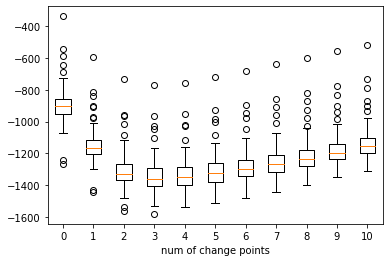

In [26]:
mbicss = [result.finalRes.U for result in results]
mbicss = np.array(mbicss)
plt.boxplot(mbicss)
plt.xlabel("num of change points")
_ = plt.xticks(list(range(1, 12)), list(range(11)))

In [27]:
time = np.linspace(0, 2, 180)
tStep = np.diff(time)[-1]
RecXmats = []
MSEss = []
for idx, result in tqdm(enumerate(results)):
    Ymat = result.Ymat
    RecXmat = result.RecXmat
    MSEs = np.mean((Ymat-RecXmat)**2, axis=1)
    MSEss.append(MSEs)
    RecXmats.append(RecXmat)

In [28]:
MSEss = np.array(MSEss)
MSEssMean = np.mean(MSEss, axis=0)

In [29]:
MSEssQs = np.quantile(MSEssMean, [0, 0.25, 0.50, 0.75, 1], interpolation="nearest")
TmpMat = MSEssMean.reshape(1, -1) - MSEssQs.reshape(-1, 1)
plotIdxs = np.argmin(np.abs(TmpMat), axis=1)
plotIdxs

array([50, 56, 51, 57, 59])

In [30]:
RecXmats = np.array(RecXmats)

In [31]:
estMean = RecXmats.mean(axis=0)
estMedian = np.median(RecXmats, axis=0)
estLower = np.quantile(RecXmats, 0.025, axis=0)
estUpper = np.quantile(RecXmats, 1-0.025, axis=0)

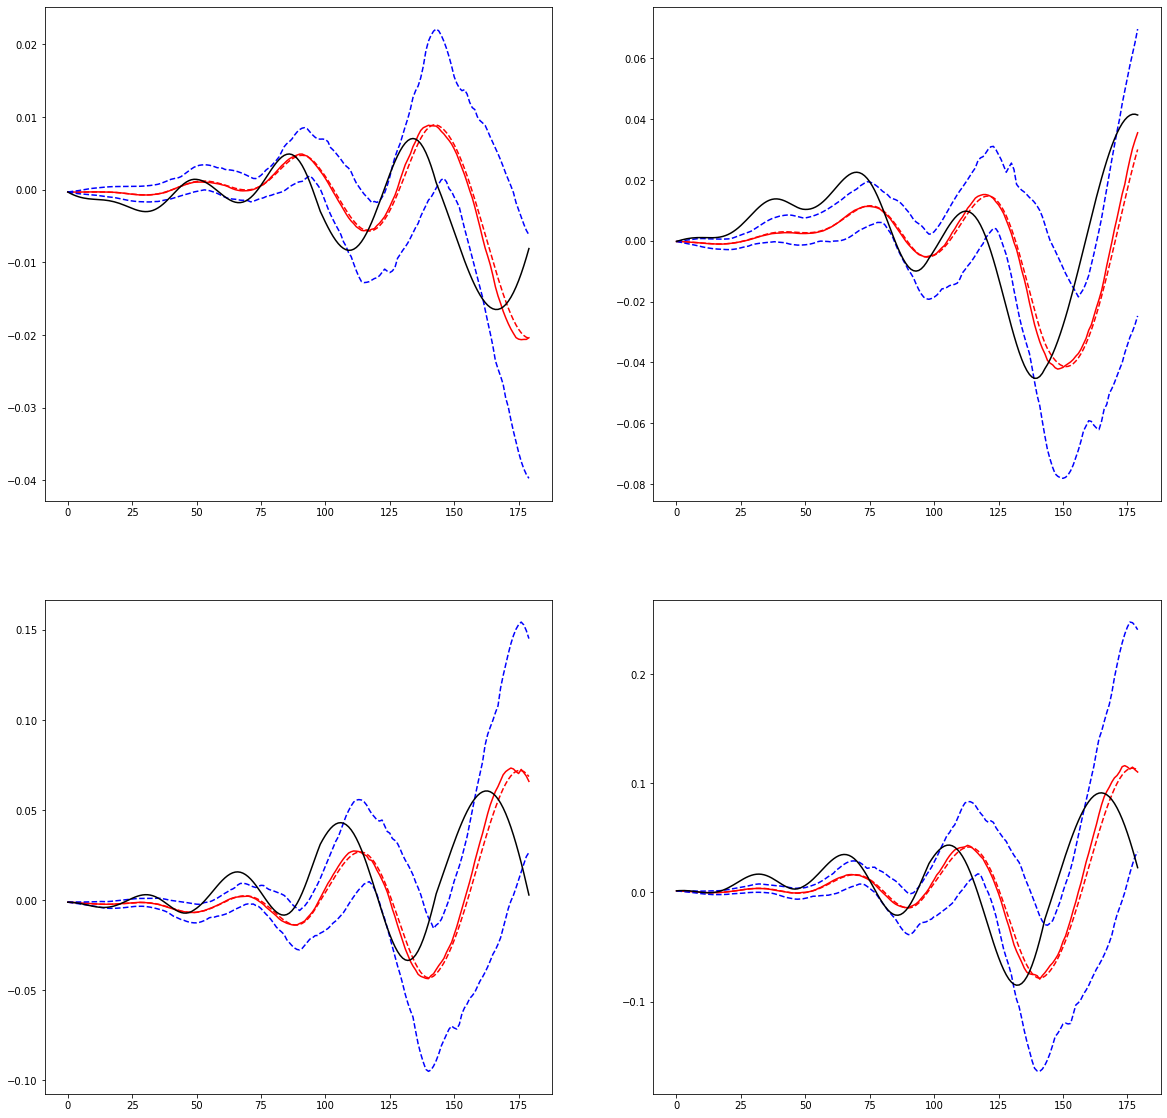

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.plot(estMean[plotIdxs[0], :], "--r")
plt.plot(estMedian[plotIdxs[0], :], "-r")
plt.plot(estLower[plotIdxs[0], :], "--b")
plt.plot(estUpper[plotIdxs[0], :], "--b")
plt.plot(results[0].TrueXmat[plotIdxs[0], :], "-", color="black")

plt.subplot(2, 2, 2)
plt.plot(estMean[plotIdxs[1], :], "--r")
plt.plot(estMedian[plotIdxs[1], :], "-r")
plt.plot(estLower[plotIdxs[1], :], "--b")
plt.plot(estUpper[plotIdxs[1], :], "--b")
plt.plot(results[0].TrueXmat[plotIdxs[1], :], "-", color="black")
plt.subplot(2, 2, 3)
plt.plot(estMean[plotIdxs[2], :], "--r")
plt.plot(estMedian[plotIdxs[2], :], "-r")
plt.plot(estLower[plotIdxs[2], :], "--b")
plt.plot(estUpper[plotIdxs[2], :], "--b")
plt.plot(results[0].TrueXmat[plotIdxs[2], :], "-", color="black")
plt.subplot(2, 2, 4)
plt.plot(estMean[plotIdxs[3], :], "--r")
plt.plot(estMedian[plotIdxs[3], :], "-r")
plt.plot(estLower[plotIdxs[3], :], "--b")
plt.plot(estUpper[plotIdxs[3], :], "--b")
_ = plt.plot(results[0].TrueXmat[plotIdxs[3], :], "-", color="black")